In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Assuming your dataset is in a CSV file named 'house_data.csv', you can read it into a pandas DataFrame as follows:
df = pd.read_csv('data.csv')

In [3]:
# Let's take a look at the first few rows of the dataset to understand its structure
df.tail()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4595,2014-07-09 00:00:00,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA
4599,2014-07-10 00:00:00,220600.000000,3.0,2.50,1490,8102,2.0,0,0,4,1490,0,1990,0,18717 SE 258th St,Covington,WA 98042,USA


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [5]:
# Now, let's extract the relevant columns from the DataFrame to create our feature matrix X and target variable y.
# 'X' will contain the independent variables (bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition)
# 'y' will contain the target variable (price)

X = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition']]
y = df['price']

In [6]:
# Next, you can split the dataset into training and testing sets using sklearn's train_test_split function:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
train_data = X_train.join(y_train)

In [8]:
train_data

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,price
1898,4.0,2.50,2770,45514,2.0,0,0,4,6.850000e+05
1370,4.0,3.00,3720,29043,2.0,0,0,3,8.570000e+05
3038,4.0,2.50,2810,11120,2.0,0,0,3,6.750000e+05
2361,4.0,3.75,4030,10800,2.0,0,0,3,1.485000e+06
156,3.0,2.00,2000,7000,2.0,0,0,3,5.610000e+05
...,...,...,...,...,...,...,...,...,...
4426,3.0,1.00,1180,5002,1.5,0,0,3,2.825089e+05
466,4.0,2.00,2520,6000,1.0,0,0,3,8.750000e+05
3092,3.0,1.00,1150,8145,1.0,0,0,4,2.900000e+05
3772,2.0,1.00,910,2002,1.5,0,0,3,6.000000e+05


array([[<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'sqft_living'}>],
       [<Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>],
       [<Axes: title={'center': 'view'}>,
        <Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

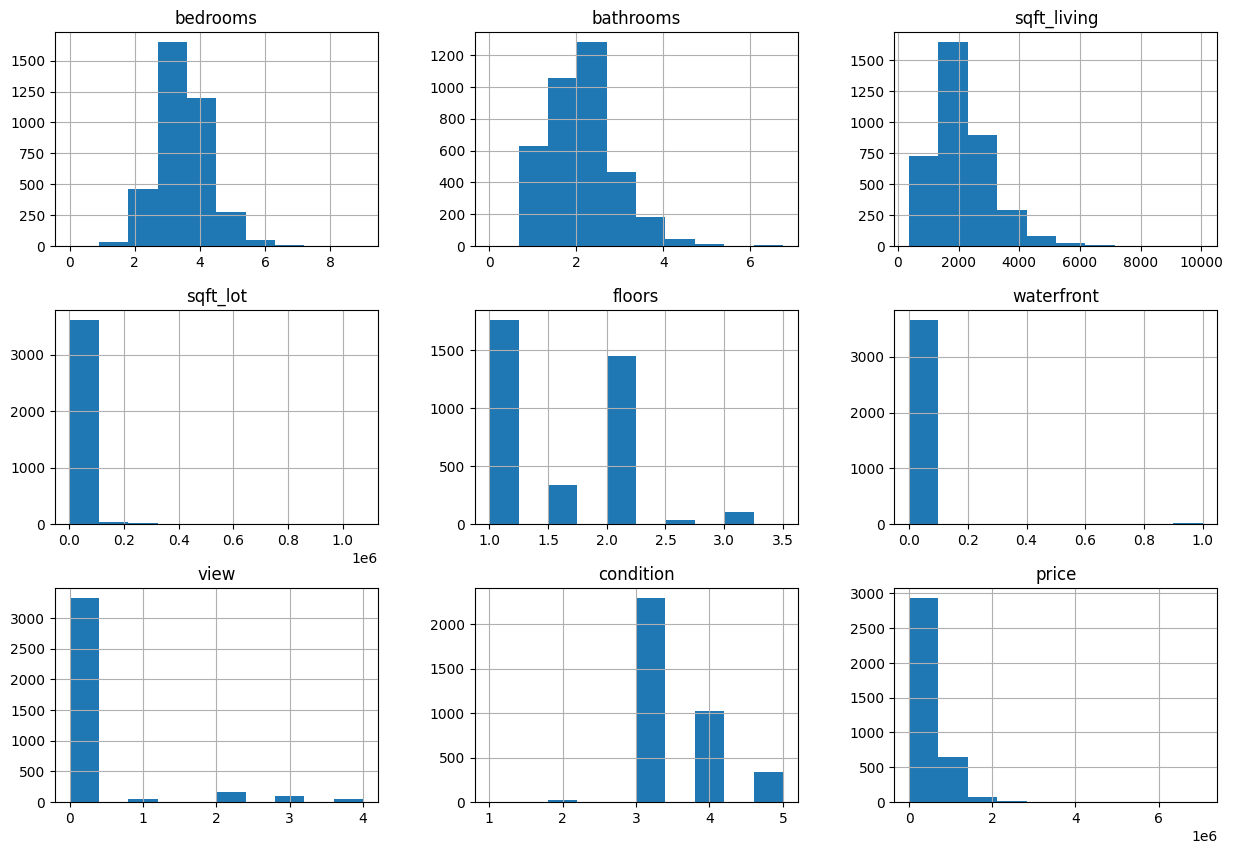

In [9]:
train_data.hist(figsize=(15,10))

<Axes: >

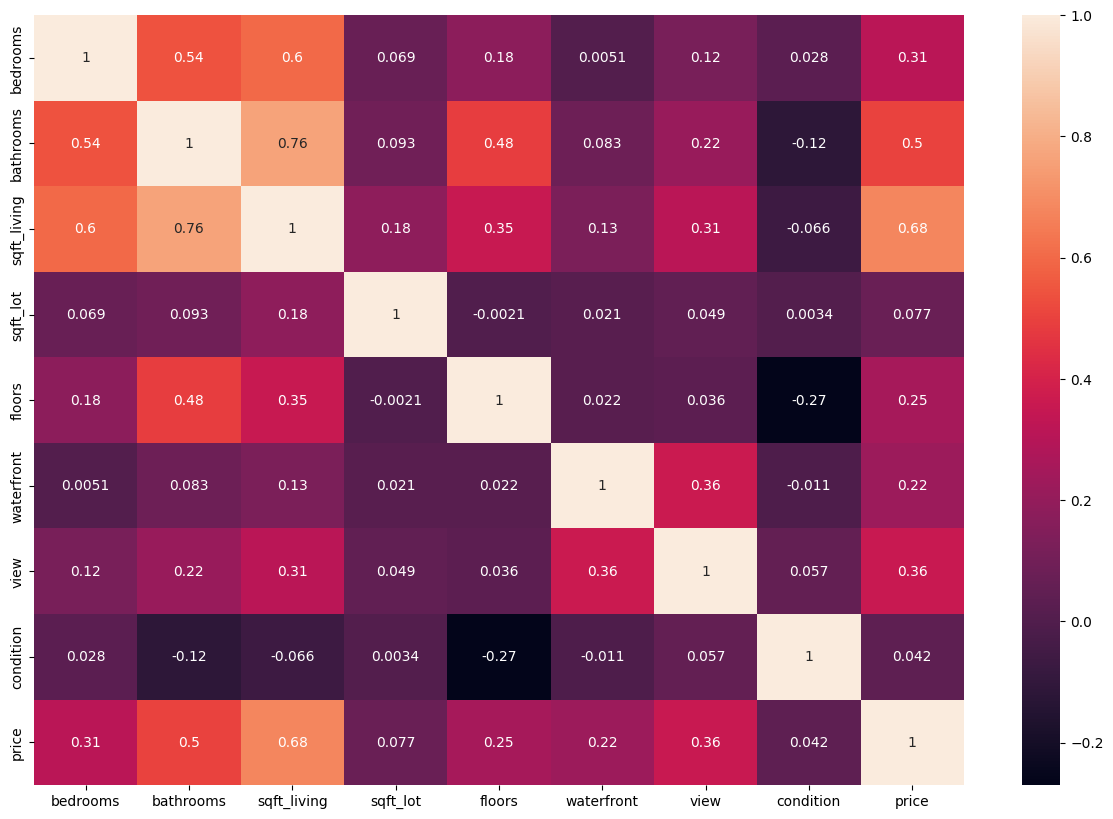

In [10]:
plt.figure(figsize=(15,10))
sns.heatmap(train_data.corr(), annot=True)

In [11]:
# Now, let's specify the feature names for X to avoid the warning message:
feature_names = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition']
X_train.columns = feature_names
X_test.columns = feature_names

In [12]:
# Now, you can build your linear regression model using sklearn's LinearRegression class:
model = LinearRegression()

In [13]:
# Fit the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [14]:
# Once the model is trained, you can use it to make predictions on new data (test set in this case):
y_pred = model.predict(X_test)

In [15]:
# To evaluate the model's performance, you can use metrics such as Mean Squared Error (MSE) and R-squared:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [16]:
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 986869414953.9735
R-squared: 0.032335189956331445


In [17]:
# You can also use the trained model to make predictions on new data by providing the feature values:
# For example, to predict the price of a house with 3 bedrooms, 2 bathrooms, 1500 sqft living area, 4000 sqft lot, 1 floor, not waterfront, no view, and condition 3:
new_data = [[3, 2, 1500, 4000, 1, 0, 0, 3]]
predicted_price = model.predict(new_data)
print("Predicted Price:", predicted_price[0])

Predicted Price: 331038.9687693153


c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
